# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

(b) Line plots from multiple columns with a legend

(c) Compute growth rates for a time series

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

(e) Compute aggregate dataset by time period

(f) Convert a dataset to long format


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#A
financial = pd.read_csv("data_raw/financial.csv") 
financial["date"] = pd.to_datetime(financial["date_str"], format = "%Y-%m-%d")


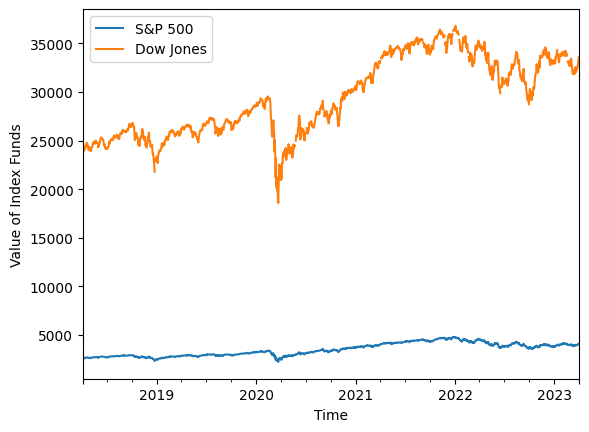

In [3]:
#B
financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

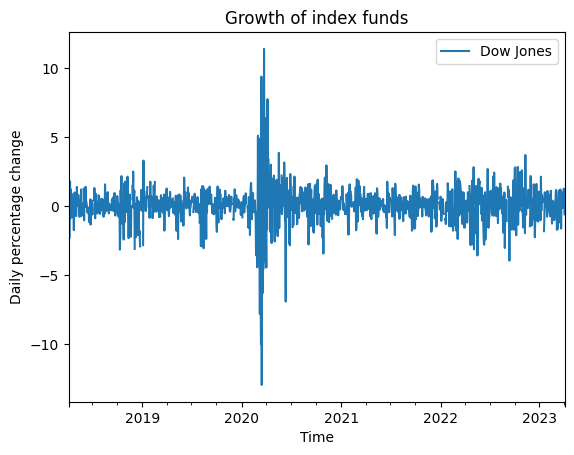

In [4]:
#C
financial["diff_djia"]   = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]

financial[["date","growth_djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.title("Growth of index funds")
plt.legend(["Dow Jones"])


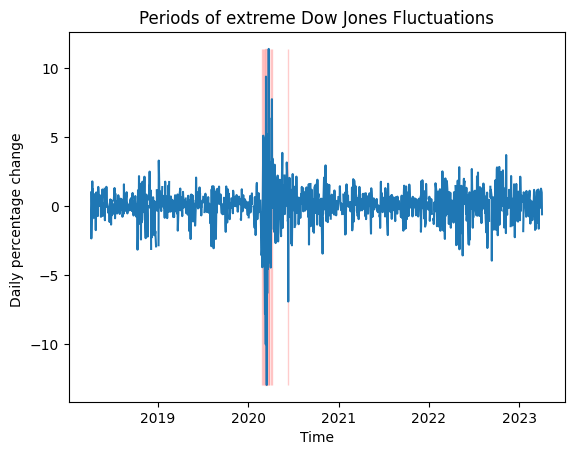

In [5]:
#D
financial["bool_djia"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

# Create a line plot
plt.plot("date", "growth_djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Periods of extreme Dow Jones Fluctuations")

# Add shaded region
vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_djia"],
                 alpha = 0.2,color = "red")

plt.show()

Text(0.5, 1.0, 'Monthly average stock market performance')

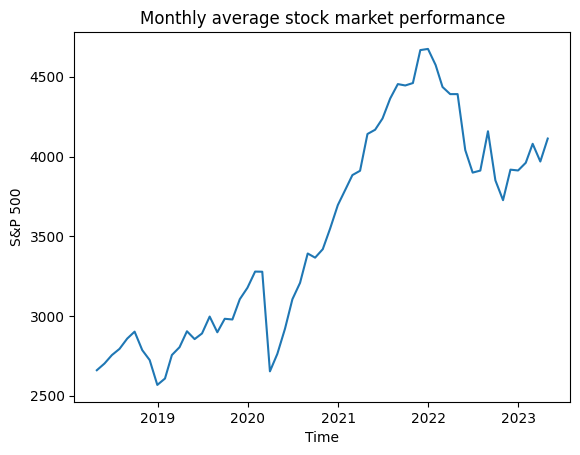

In [11]:
#E
month_config = pd.Grouper(key='date', freq='m')
#month_config = financial["date"].dt.to_period(freq = "m")
monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())
plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average stock market performance")

In [9]:
#F
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])